### Carregando as bibliotecas e dados:

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações de estilo para os gráficos
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Carregar os dados
customers = pd.read_csv('../../../material/dados/olist_customers_dataset.csv')
geolocation = pd.read_csv('../../../material/dados/olist_geolocation_dataset.csv')
order_items = pd.read_csv('../../../material/dados/olist_order_items_dataset.csv')
order_payments = pd.read_csv('../../../material/dados/olist_order_payments_dataset.csv')
order_reviews = pd.read_csv('../../../material/dados/olist_order_reviews_dataset.csv')
orders = pd.read_csv('../../../material/dados/olist_orders_dataset.csv')
products = pd.read_csv('../../../material/dados/olist_products_dataset.csv')
sellers = pd.read_csv('../../../material/dados/olist_sellers_dataset.csv')
category_translation = pd.read_csv('..//../../material/dados/product_category_name_translation.csv')

# Visualizar as primeiras linhas de cada dataframe
customers.head(), geolocation.head(), order_items.head(), order_payments.head(), order_reviews.head(), orders.head(), products.head(), sellers.head(), category_translation.head()


(                        customer_id                customer_unique_id  \
 0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
 1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
 2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
 3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
 4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   
 
    customer_zip_code_prefix          customer_city customer_state  
 0                     14409                 franca             SP  
 1                      9790  sao bernardo do campo             SP  
 2                      1151              sao paulo             SP  
 3                      8775        mogi das cruzes             SP  
 4                     13056               campinas             SP  ,
    geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
 0                         1037       -23.545621       -46.639292   
 

### Unindo as bases de dados

In [21]:
# Unir order_items com orders
order_items_orders = pd.merge(order_items, orders, on='order_id', how='inner')

# Unir order_items_orders com customers
order_items_orders_customers = pd.merge(order_items_orders, customers, on='customer_id', how='inner')

# Unir order_items_orders_customers com order_payments
order_items_orders_customers_payments = pd.merge(order_items_orders_customers, order_payments, on='order_id', how='inner')

# Visualizar a base final unificada
order_items_orders_customers_payments.head()


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,2017-09-20 23:43:48,2017-09-29 00:00:00,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,1,credit_card,2,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,...,2017-05-12 16:04:24,2017-05-15 00:00:00,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,1,credit_card,3,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,...,2018-01-22 13:19:16,2018-02-05 00:00:00,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,1,credit_card,5,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,...,2018-08-14 13:32:39,2018-08-20 00:00:00,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,1,credit_card,2,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,...,2017-03-01 16:42:31,2017-03-17 00:00:00,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,1,credit_card,3,218.04


### Formulando as perguntas
##### Pergunta 1: Qual é a média de valor de pedido por estado?
Análise da média do valor de pedido por estado, considerando o preço e o valor do frete.

In [22]:
# Calcular o valor total de cada pedido (preço + frete)
order_items_orders_customers_payments['total_value'] = order_items_orders_customers_payments['price'] + order_items_orders_customers_payments['freight_value']

# Calcular a média de valor de pedido por estado
avg_order_value_by_state = order_items_orders_customers_payments.groupby('customer_state')['total_value'].mean().reset_index()

# Visualizar o resultado
avg_order_value_by_state.sort_values(by='total_value', ascending=False).head()


,customer_state,total_value
14,PB,236.882723
0,AC,219.594737
1,AL,217.203079
26,TO,205.612124
20,RO,205.180070


##### Pergunta 2: Qual é a distribuição de métodos de pagamento utilizados pelos clientes?
Análise da distribuição dos métodos de pagamento utilizados pelos clientes.

In [23]:
# Contar a quantidade de cada método de pagamento
payment_method_distribution = order_items_orders_customers_payments['payment_type'].value_counts().reset_index()

# Renomear as colunas
payment_method_distribution.columns = ['payment_type', 'count']

# Visualizar o resultado
payment_method_distribution


,payment_type,count
0,credit_card,86769
1,boleto,22867
2,voucher,6274
3,debit_card,1691


##### Pergunta 3: Qual é a distribuição dos scores de avaliação dos pedidos?

In [24]:
# Unir order_reviews com a base final unificada
order_reviews_full = pd.merge(order_reviews, order_items_orders_customers_payments, on='order_id', how='inner')

# Contar a quantidade de cada score de avaliação
review_score_distribution = order_reviews_full['review_score'].value_counts().reset_index()

# Renomear as colunas
review_score_distribution.columns = ['review_score', 'count']

# Visualizar o resultado
review_score_distribution


,review_score,count
0,5,66264
1,4,22286
2,1,14854
3,3,9840
4,2,4085


##### Pergunta 4: Qual é a relação entre o valor do pedido e o score de avaliação?

In [25]:
# Calcular a média de valor de pedido para cada score de avaliação
avg_order_value_by_score = order_reviews_full.groupby('review_score')['total_value'].mean().reset_index()

# Visualizar o resultado
avg_order_value_by_score


,review_score,total_value
0,1,149.223593
1,2,137.716539
2,3,129.386736
3,4,139.174844
4,5,140.903872


##### Pergunta 5: Quais são os produtos mais vendidos?

In [26]:
# Contar a quantidade vendida de cada produto
top_selling_products = order_items_orders_customers_payments.groupby('product_id')['order_item_id'].count().reset_index()

# Renomear as colunas
top_selling_products.columns = ['product_id', 'quantity_sold']

# Ordenar os produtos pela quantidade vendida
top_selling_products = top_selling_products.sort_values(by='quantity_sold', ascending=False).head(10)

# Unir com a tabela de produtos para obter o nome dos produtos
top_selling_products = pd.merge(top_selling_products, products[['product_id', 'product_category_name']], on='product_id', how='inner')

# Traduzir os nomes das categorias de produtos
top_selling_products = pd.merge(top_selling_products, category_translation, on='product_category_name', how='inner')

# Visualizar o resultado
top_selling_products


,product_id,quantity_sold,product_category_name,product_category_name_english
0,aca2eb7d00ea1a7b8ebd4e68314663af,536,moveis_decoracao,furniture_decor
1,99a4788cb24856965c36a24e339b6058,525,cama_mesa_banho,bed_bath_table
2,422879e10f46682990de24d770e7f83d,505,ferramentas_jardim,garden_tools
3,389d119b48cf3043d311335e499d9c6b,406,ferramentas_jardim,garden_tools
4,368c6c730842d78016ad823897a372db,395,ferramentas_jardim,garden_tools
5,53759a2ecddad2bb87a079a1f1519f73,389,ferramentas_jardim,garden_tools
6,d1c427060a0f73f6b889a5c7c61f2ac4,357,informatica_acessorios,computers_accessories
7,53b36df67ebb7c41585e8d54d6772e08,327,relogios_presentes,watches_gifts
8,154e7e31ebfa092203795c972e5804a6,283,beleza_saude,health_beauty
9,3dd2a17168ec895c781a9191c1e95ad7,278,informatica_acessorios,computers_accessories


### Visualizando os Resultados
##### Gráfico 1: Média de Valor de Pedido por Estado

C:\Users\Juliana\AppData\Local\Temp\ipykernel_24568\3254479299.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='customer_state', y='total_value', data=avg_order_value_by_state, palette='viridis')


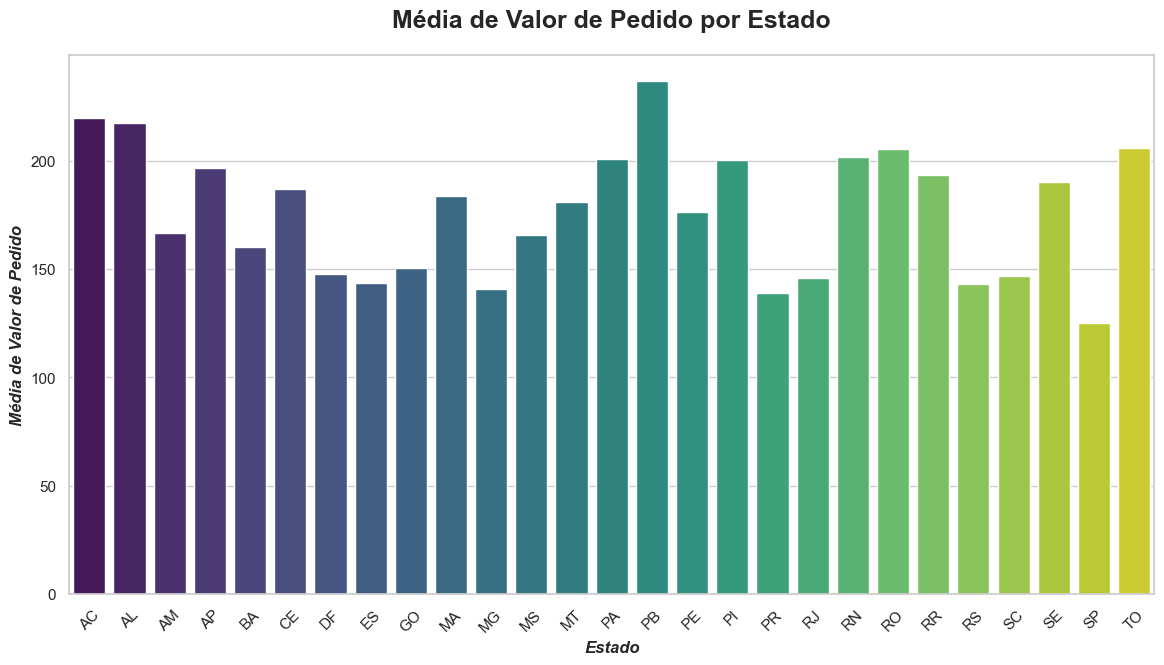

In [27]:
plt.figure(figsize=(14, 7))
sns.barplot(x='customer_state', y='total_value', data=avg_order_value_by_state, palette='viridis')
plt.title('Média de Valor de Pedido por Estado', pad=20, fontsize=18, weight='bold')
plt.xlabel('Estado', fontsize=12, fontweight='bold',  fontstyle='italic')
plt.ylabel('Média de Valor de Pedido', fontsize=12, fontweight='bold',  fontstyle='italic')
plt.xticks(rotation=45)
plt.show()


##### Gráfico 2: Distribuição dos Métodos de Pagamento

C:\Users\Juliana\AppData\Local\Temp\ipykernel_24568\1772811246.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='payment_type', y='count', data=payment_method_distribution, palette='muted')


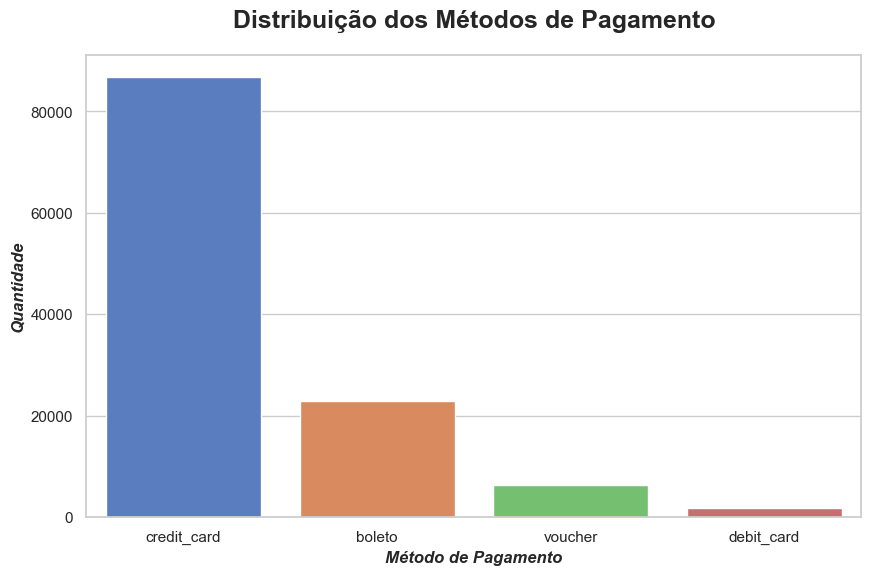

In [28]:
plt.figure(figsize=(10, 6))
sns.barplot(x='payment_type', y='count', data=payment_method_distribution, palette='muted')
plt.title('Distribuição dos Métodos de Pagamento', pad=20, fontsize=18, weight='bold')
plt.xlabel('Método de Pagamento', fontsize=12, fontweight='bold',  fontstyle='italic')
plt.ylabel('Quantidade', fontsize=12, fontweight='bold',  fontstyle='italic')
plt.show()



##### Gráfico 3: Distribuição dos Scores de Avaliação

C:\Users\Juliana\AppData\Local\Temp\ipykernel_24568\1541464626.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='review_score', y='count', data=review_score_distribution, palette='pastel')


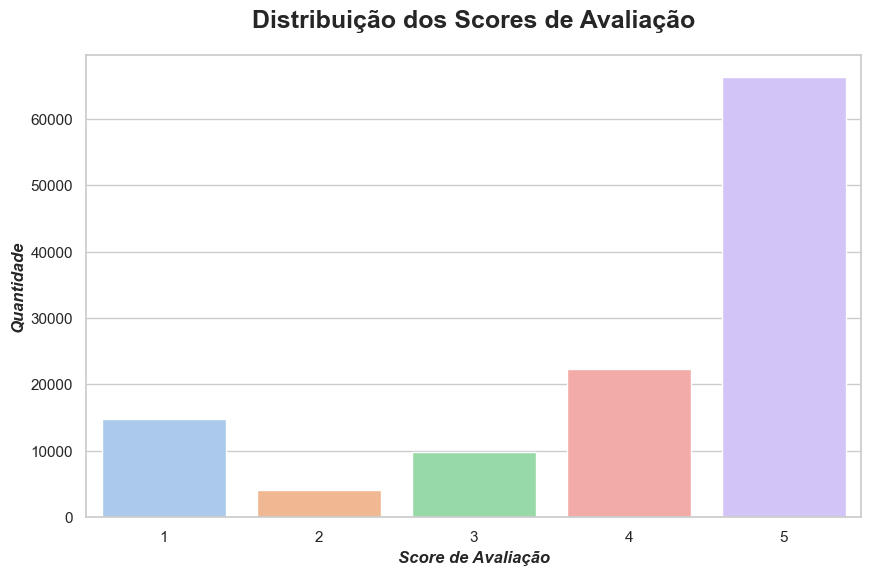

In [29]:
plt.figure(figsize=(10, 6))
sns.barplot(x='review_score', y='count', data=review_score_distribution, palette='pastel')
plt.title('Distribuição dos Scores de Avaliação', pad=20, fontsize=18, weight='bold')
plt.xlabel('Score de Avaliação', fontsize=12, fontweight='bold',  fontstyle='italic')
plt.ylabel('Quantidade', fontsize=12, fontweight='bold',  fontstyle='italic')
plt.show()


##### Gráfico 4: Relação entre o Valor do Pedido e o Score de Avaliação

C:\Users\Juliana\AppData\Local\Temp\ipykernel_24568\3132830289.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='review_score', y='total_value', data=avg_order_value_by_score, palette='coolwarm')


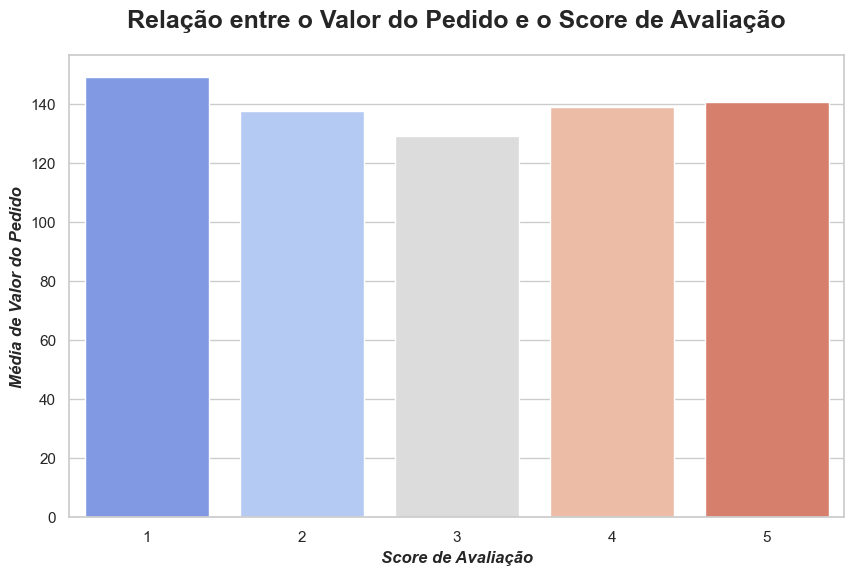

In [30]:
plt.figure(figsize=(10, 6))
sns.barplot(x='review_score', y='total_value', data=avg_order_value_by_score, palette='coolwarm')
plt.title('Relação entre o Valor do Pedido e o Score de Avaliação', pad=20, fontsize=18, weight='bold')
plt.xlabel('Score de Avaliação', fontsize=12, fontweight='bold',  fontstyle='italic')
plt.ylabel('Média de Valor do Pedido', fontsize=12, fontweight='bold',  fontstyle='italic')
plt.show()


##### Gráfico 5: Produtos Mais Vendidos

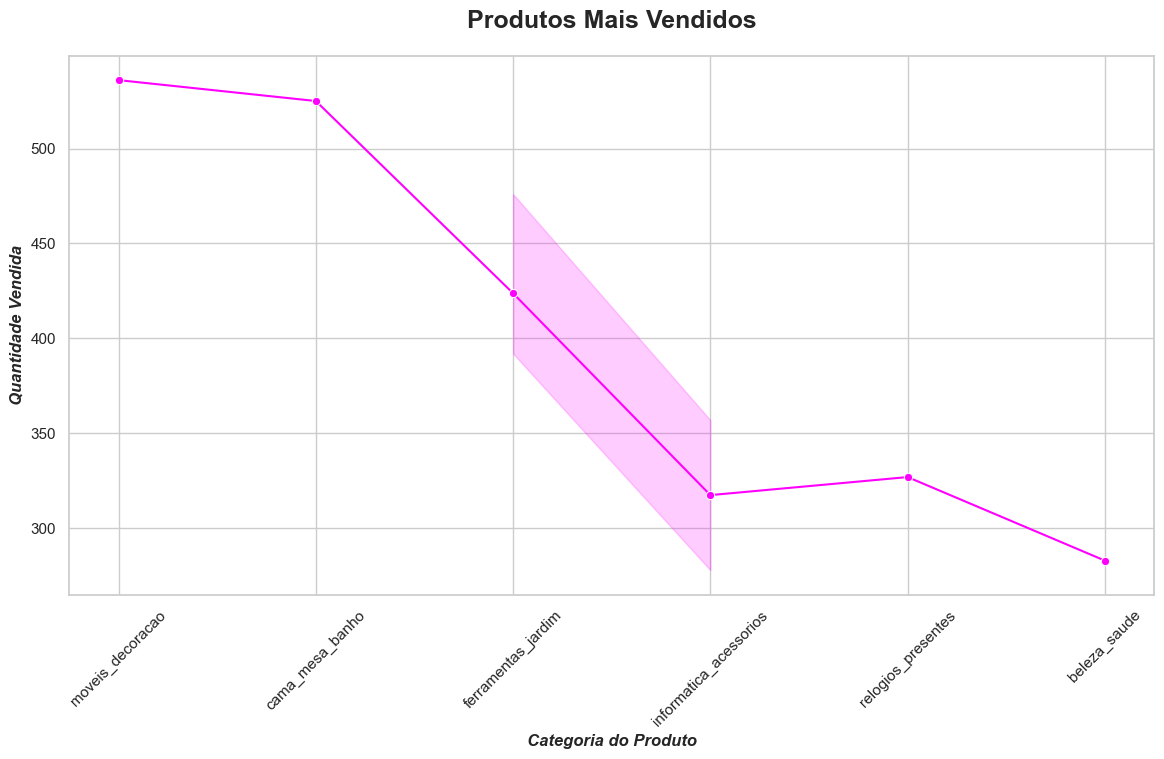

In [31]:
plt.figure(figsize=(14, 7))
sns.lineplot(x='product_category_name', y='quantity_sold', data=top_selling_products, marker='o', color='magenta')
plt.title('Produtos Mais Vendidos', pad=20, fontsize=18, weight='bold')
plt.xlabel('Categoria do Produto', fontsize=12, fontweight='bold',  fontstyle='italic')
plt.ylabel('Quantidade Vendida', fontsize=12, fontweight='bold',  fontstyle='italic')
plt.xticks(rotation=45)
plt.show()



### Exportando as bases finais

In [32]:
order_items_orders_customers_payments.to_csv('base_final_olist.csv', index=False)

In [33]:
order_reviews_full.to_csv('base_final_olist_completa.csv', index=False)